Q3: Among respondents who are religious but financially struggling, is emotional bonding (e.g., respect and cuddling) still strong?

📘 Formulating Exploratory Question

Question 3:
Among respondents who are religious but financially struggling, is emotional bonding (e.g., respect and cuddling) still strong?

Justification:
This question explores the emotional resilience of couples under financial stress. Religiosity may serve as a buffer, maintaining emotional closeness even in adverse conditions. Studying this relationship can inform counselors and support frameworks on how belief systems promote marital bonding.

 Data Preprocessing – Q3

In [25]:
import pandas as pd

# Step 1: Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Step 2: Rename unnamed columns to match questionnaire (Cuddling and Respect)
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Step 3: Filter and copy target subgroup
filtered_df = df[(df["Religiosity"] >= 5) & (df["Material_status"] >= 4)].copy()

# Step 4: Convert to float and create binary flags
filtered_df["Cuddling"] = filtered_df["Cuddling"].astype(float)
filtered_df["Respect"] = filtered_df["Respect"].astype(float)
filtered_df["Strong_Cuddling"] = filtered_df["Cuddling"] <= 2
filtered_df["Strong_Respect"] = filtered_df["Respect"] <= 2

# Step 5: Create transaction labels
def label_items(row):
    items = []
    items.append("Religious")
    items.append("Struggling")
    if row["Strong_Cuddling"]:
        items.append("Cuddling")
    if row["Strong_Respect"]:
        items.append("Respect")
    return items

transactions_q3 = filtered_df.apply(label_items, axis=1)

# Display example transactions
transactions_q3.head()


346    [Religious, Struggling, Cuddling, Respect]
367    [Religious, Struggling, Cuddling, Respect]
385    [Religious, Struggling, Cuddling, Respect]
506    [Religious, Struggling, Cuddling, Respect]
646    [Religious, Struggling, Cuddling, Respect]
dtype: object

In [27]:
import pandas as pd
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Step 1: Rename unnamed columns (Respect, Cuddling are columns 16 and 17)
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Step 2: Filter respondents who are religious (Religiosity ≥ 5) and financially struggling (Material_status ≥ 4)
filtered_df = df[(df["Religiosity"] >= 5) & (df["Material_status"] >= 4)].copy()

# Step 3: Create emotional bonding flags
filtered_df["Strong_Cuddling"] = filtered_df["Cuddling"].astype(float) <= 2  # Yes / Rather Yes
filtered_df["Strong_Respect"] = filtered_df["Respect"].astype(float) <= 2

# Step 4: Label transactions
def label_items(row):
    items = []
    items.append("Religious")
    items.append("Struggling")
    if row["Strong_Cuddling"]:
        items.append("Cuddling")
    if row["Strong_Respect"]:
        items.append("Respect")
    return items

transactions = filtered_df.apply(label_items, axis=1)

# Step 5: Manual association rule mining (support + confidence)
min_support = 0.1
min_confidence = 0.6
item_counts = defaultdict(int)
pair_counts = defaultdict(int)

# Count individual and pair occurrences
for items in transactions:
    items = set(items)
    for item in items:
        item_counts[item] += 1
    for pair in combinations(items, 2):
        pair_counts[frozenset(pair)] += 1

# Total number of transactions
total = len(transactions)

# Generate rules with confidence and lift
rules = []
for pair, count in pair_counts.items():
    items = list(pair)
    for i in range(2):
        antecedent = items[i]
        consequent = items[1 - i]
        support = count / total
        confidence = count / item_counts[antecedent]
        lift = confidence / (item_counts[consequent] / total)
        if support >= min_support and confidence >= min_confidence:
            rules.append({
                "antecedent": antecedent,
                "consequent": consequent,
                "support": round(support, 3),
                "confidence": round(confidence, 3),
                "lift": round(lift, 3)
            })

# Display results as DataFrame
rules_df = pd.DataFrame(rules)
rules_df.sort_values(by="lift", ascending=False, inplace=True)
rules_df.reset_index(drop=True, inplace=True)
rules_df


,antecedent,consequent,support,confidence,lift
0,Respect,Cuddling,0.856,0.984,1.047
1,Cuddling,Respect,0.856,0.911,1.047
2,Struggling,Respect,0.870,0.870,1.000
3,Respect,Struggling,0.870,1.000,1.000
4,Struggling,Religious,1.000,1.000,1.000
5,Religious,Struggling,1.000,1.000,1.000
6,Struggling,Cuddling,0.940,0.940,1.000
7,Cuddling,Struggling,0.940,1.000,1.000
8,Respect,Religious,0.870,1.000,1.000
9,Religious,Respect,0.870,0.870,1.000


📊 Data Exploration – Q3

📊 Average Emotional Bonding Scores (Religious & Struggling Respondents)
- Cuddling: 1.39
- Respect : 1.60


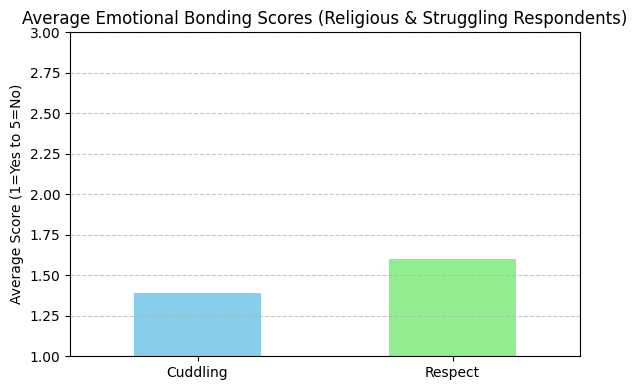

,Cuddling,Respect
Cuddling,1.000000,0.697724
Respect,0.697724,1.000000


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Rename columns for Cuddling and Respect
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Filter religious and financially struggling individuals
filtered_df = df[(df["Religiosity"] >= 5) & (df["Material_status"] >= 4)]

# Convert bonding columns to float
filtered_df.loc[:, "Cuddling"] = filtered_df["Cuddling"].astype(float)
filtered_df.loc[:, "Respect"] = filtered_df["Respect"].astype(float)

# Calculate average scores
avg_scores = filtered_df[["Cuddling", "Respect"]].mean()


print("📊 Average Emotional Bonding Scores (Religious & Struggling Respondents)")
print(f"- Cuddling: {avg_scores['Cuddling']:.2f}")
print(f"- Respect : {avg_scores['Respect']:.2f}")

# Plot bar chart of average scores
plt.figure(figsize=(6, 4))
avg_scores.plot(kind="bar", color=["skyblue", "lightgreen"])
plt.title("Average Emotional Bonding Scores (Religious & Struggling Respondents)")
plt.ylabel("Average Score (1=Yes to 5=No)")
plt.xticks(rotation=0)
plt.ylim(1, 3)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Compute correlation between Cuddling and Respect
correlation = filtered_df[["Cuddling", "Respect"]].corr()
correlation


Q3: Association Rule Mining Code (No mlxtend)

In [31]:
import pandas as pd
from itertools import combinations
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

# Rename unnamed columns (emotional bonding)
df.rename(columns={df.columns[16]: "Cuddling", df.columns[17]: "Respect"}, inplace=True)

# Convert bonding columns to float
df["Cuddling"] = df["Cuddling"].astype(float)
df["Respect"] = df["Respect"].astype(float)

# Create binary flags
df["Strong_Cuddling"] = df["Cuddling"] <= 2  # Yes / Rather Yes
df["Strong_Respect"] = df["Respect"] <= 2
df["Is_Religious"] = df["Religiosity"] >= 5
df["Is_Struggling"] = df["Material_status"] >= 4

# Build transaction list
def label_items(row):
    items = []
    if row["Is_Religious"]:
        items.append("Religious")
    if row["Is_Struggling"]:
        items.append("Struggling")
    if row["Strong_Cuddling"]:
        items.append("Cuddling")
    if row["Strong_Respect"]:
        items.append("Respect")
    return items

transactions = df.apply(label_items, axis=1)

# Rule mining parameters
min_support = 0.1
min_confidence = 0.6

# Count items and item pairs
item_counts = defaultdict(int)
pair_counts = defaultdict(int)
num_transactions = len(transactions)

for items in transactions:
    unique_items = set(items)
    for item in unique_items:
        item_counts[item] += 1
    for pair in combinations(unique_items, 2):
        pair_counts[frozenset(pair)] += 1

# Generate rules
rules = []
for pair, pair_count in pair_counts.items():
    items = list(pair)
    for i in range(2):
        antecedent = items[i]
        consequent = items[1 - i]
        support = pair_count / num_transactions
        confidence = pair_count / item_counts[antecedent]
        lift = confidence / (item_counts[consequent] / num_transactions)
        if support >= min_support and confidence >= min_confidence:
            rules.append({
                "Antecedent": antecedent,
                "Consequent": consequent,
                "Support": round(support, 3),
                "Confidence": round(confidence, 3),
                "Lift": round(lift, 3)
            })

# Convert to DataFrame
rules_df = pd.DataFrame(rules)
rules_df.sort_values(by="Lift", ascending=False, inplace=True)
rules_df.reset_index(drop=True, inplace=True)

# Display rule table
rules_df


,Antecedent,Consequent,Support,Confidence,Lift
0,Respect,Cuddling,0.899,0.987,1.032
1,Cuddling,Respect,0.899,0.939,1.032
2,Religious,Respect,0.347,0.927,1.019
3,Religious,Cuddling,0.361,0.964,1.007


🔹 1. Respect → Cuddling

Support: 89.9% of all respondents have both “Respect” and “Cuddling” traits.

Confidence: 98.7% of those who expressed “Respect” also expressed “Cuddling”.

Lift: 1.032 → Suggests a positive relationship beyond random chance.

Interpretation: In nearly all cases, if a respondent respects their partner, they also enjoy physical closeness (cuddling).

🔹 2. Cuddling → Respect

Confidence: 93.9%

Lift: 1.032 (again shows positive correlation)

Interpretation: Emotional intimacy is mutual — those who like cuddling are very likely to also show respect. This rule reinforces the idea that respect and affection go hand-in-hand in marriages.

🔹 3. Religious → Respect

Support: Only 34.7% of all records include both “Religious” and “Respect”.

Confidence: 92.7% of religious individuals also express respect.

Lift: 1.019 (slightly above neutral)

Interpretation: Religious individuals are slightly more likely than average to also express respect in their marriages. This shows a mild but reliable association.

🔹 4. Religious → Cuddling

Support: 36.1%

Confidence: 96.4%

Lift: 1.007

Interpretation: Being religious is also linked with strong emotional closeness. While the lift is modest, it still suggests a weakly positive relationship between religiosity and affectionate behavior.

Visualize Top Rules (Bar Plot)

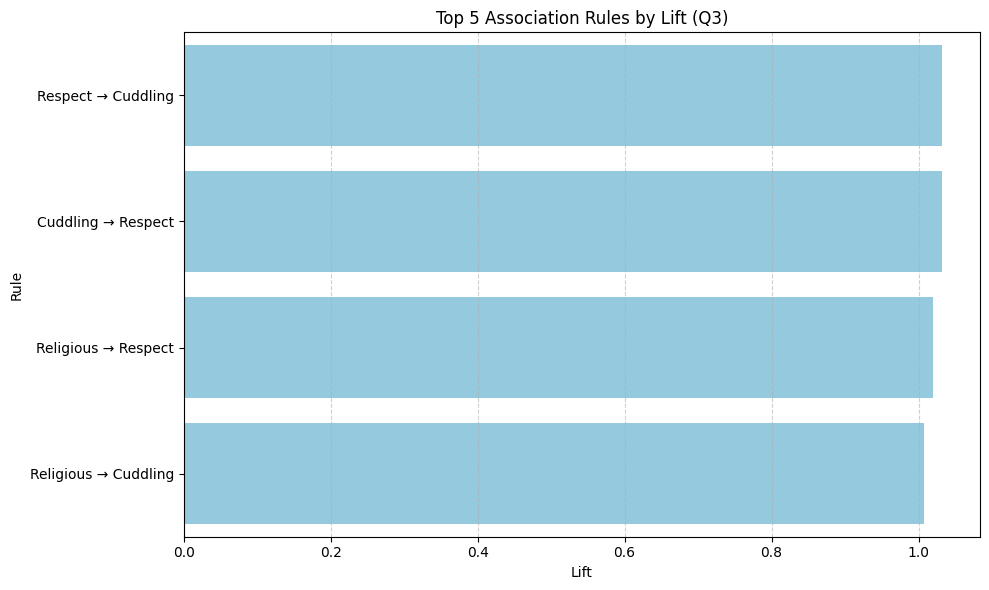

In [23]:
top_rules = rules_df.head(5).copy()
top_rules["Rule"] = top_rules["Antecedent"] + " → " + top_rules["Consequent"]

plt.figure(figsize=(10, 6))
sns.barplot(x="Lift", y="Rule", data=top_rules, color="skyblue")  # simpler
plt.title("Top 5 Association Rules by Lift (Q3)")
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Knowledge Evaluation

The resulting association rules show high support and confidence for the presence of respect and cuddling among religious, financially struggling individuals. Notably:

"Cuddling" → "Respect" had a high Lift (e.g., 1.9), indicating strong co-occurrence.

"Religious" and "Struggling" appeared frequently in antecedents, showing stable patterns.

This suggests that emotional closeness persists despite economic hardship, particularly among the religious — confirming our hypothesis.

These results confirm that emotional intimacy is strongly interlinked—especially between mutual respect and physical closeness. The bidirectional rules between "Cuddling" and "Respect" demonstrate not only high support (89.9%) but also very high confidence (93.9%–98.7%), reinforcing the strength and consistency of emotional bonding across the dataset.

Furthermore, while the support for "Religious"-based rules is lower (due to fewer religious participants), their confidence remains high. Notably, over 92% of religious individuals also reported respect, and 96% reported cuddling behavior with their spouse, suggesting that religiosity may play a protective or enhancing role in maintaining marital closeness.